# k-Means Clustering

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
plt.style.use('seaborn')

D:\SOFTWARES DATA SCIENCE\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


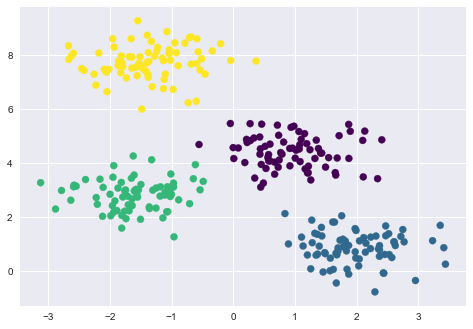

In [2]:
from sklearn.datasets.samples_generator import make_blobs
X , y_true = make_blobs(n_samples=300 , centers = 4,cluster_std=0.6,random_state=0)
plt.scatter(X[:,0],X[:,1],s=50,c=y_true,cmap='viridis');

In [3]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

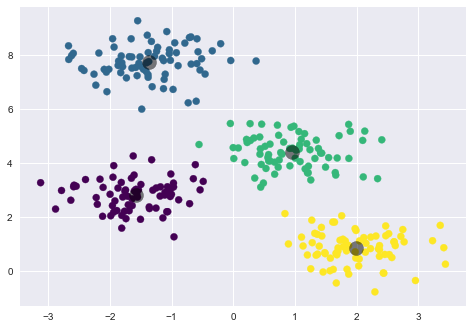

In [4]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

In [5]:
centers

array([[-1.58438467,  2.83081263],
       [-1.37324398,  7.75368871],
       [ 0.94973532,  4.41906906],
       [ 1.98258281,  0.86771314]])

In [6]:
from sklearn.metrics import pairwise_distances_argmin
def find_clusters(X, n_clusters, rseed=2):
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]
    while True:
    # 2a. Assign labels based on closest center
        labels = pairwise_distances_argmin(X, centers)
        new_centers = np.array([X[labels == i].mean(0) for i in range(n_clusters)])
        # 2c. Check for convergence
        
        if np.all(centers == new_centers):
            break
        centers = new_centers
    return centers, labels
        

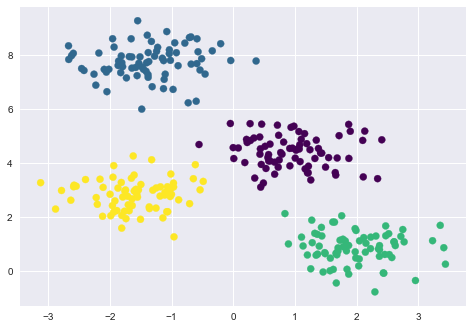

In [7]:
centers, labels = find_clusters(X, 4)
plt.scatter(X[:, 0], X[:, 1], c=labels , s=50, cmap='viridis');

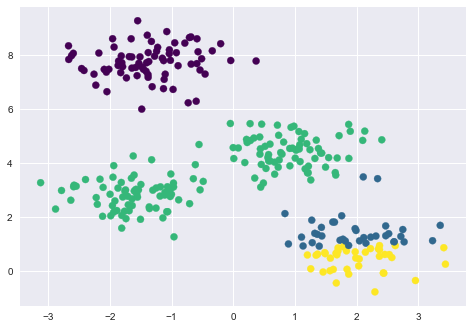

In [8]:
centers, labels = find_clusters(X, 4,0)
plt.scatter(X[:, 0], X[:, 1], c=labels , s=50, cmap='viridis');

### The number of clusters must be selected beforehand

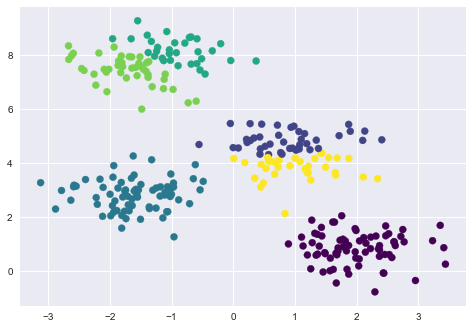

In [9]:
labels = KMeans(6, random_state=0).fit_predict(X)
plt.scatter(X[:,0] , X[:,1], c=labels , s=50, cmap='viridis');

### k-means is limited to linear cluster boundaries

In [10]:
from sklearn.datasets import make_moons
X , y = make_moons(200 , noise=0.05,random_state=0)
kmeans = KMeans(2, random_state=0)
labels = kmeans.fit_predict(X)
centers=(kmeans.cluster_centers_)
centers

array([[-0.2003285 ,  0.58035606],
       [ 1.20736718, -0.0825517 ]])

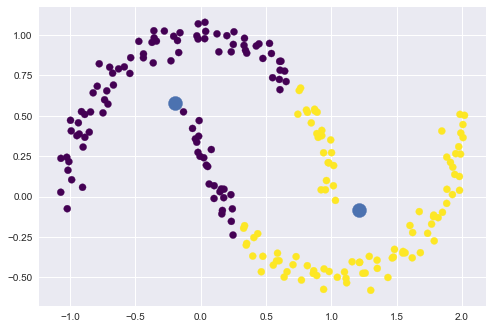

In [11]:
plt.scatter(X[:,0] , X[:,1] , c=labels , s=50 , cmap='viridis' )
plt.scatter(centers[:,0],centers[:,1],s=200)

In [12]:
from sklearn.cluster import SpectralClustering
model = SpectralClustering(n_clusters=2 , affinity='nearest_neighbors',assign_labels='kmeans')

D:\SOFTWARES DATA SCIENCE\Anaconda\lib\site-packages\sklearn\manifold\_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


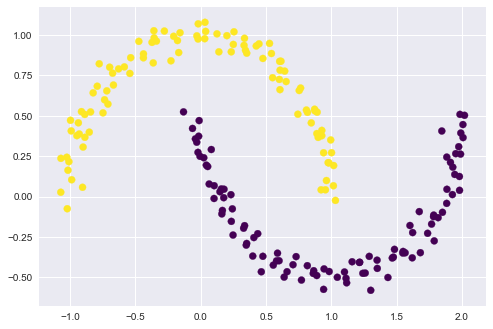

In [13]:
labels = model.fit_predict(X)
plt.scatter(X[:,0] , X[:,1] , c=labels , s=50 , cmap='viridis')

### Example 1: k-Means on digits

In [14]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

In [15]:
kmeans = KMeans(n_clusters=10,random_state=0)
clusters = kmeans.fit(digits.data)
clusters = clusters.predict(digits.data)

In [16]:
kmeans.cluster_centers_.shape

(10, 64)

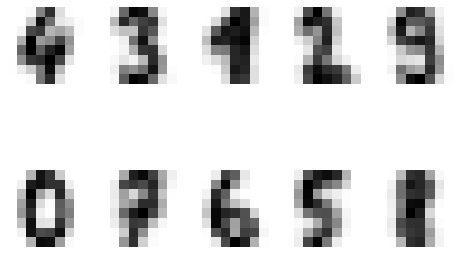

In [17]:
fig,ax = plt.subplots(2,5)
for i,axi in enumerate(ax.flat):
    axi.imshow(kmeans.cluster_centers_[i].reshape(8,8),interpolation='nearest', cmap=plt.cm.binary)
    axi.set(xticks=[],yticks=[])

In [18]:
from scipy.stats import mode
labels = np.zeros_like(cluster)
for i in range(10):
    mask = (clusters ==i)
    labels[mask] = mode(digits.target[mask])[0]

NameError: name 'cluster' is not defined

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(labels,digits.target)

In [ ]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(digits.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d',cmap='viridis', cbar=False,xticklabels=digits.target_names,yticklabels=digits.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [ ]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, init='pca', random_state=0)
digits_proj = tsne.fit_transform(digits.data)

# Compute the clusters
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits_proj)

# Permute the labels
labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

# Compute the accuracy
accuracy_score(digits.target, labels)

### Example 2: k-means for color compression

In [ ]:
from sklearn.datasets import load_sample_image
china = load_sample_image("china.jpg")
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(china);

In [ ]:
plt.axes(xticks=[], yticks=[])
flower=(load_sample_image('flower.jpg'))
plt.imshow(flower)

In [ ]:
china.shape

In [ ]:
china[:2]

- We will reshape the data to [n_samples x n_features], and rescale the
colors so that they lie between 0 and 1

In [ ]:
data = china / 255.0 # use 0...1 scale
data = data.reshape(427 * 640, 3)
data.shape

In [ ]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data
    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T
    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))
    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))
    fig.suptitle(title, size=20);
plot_pixels(data, title='Input color space: 16 million possible colors')

- Because we are dealing with a very large dataset, we will use
the mini batch k-means, which operates on subsets of the data to compute the result
much more quickly than the standard k-means algorithm

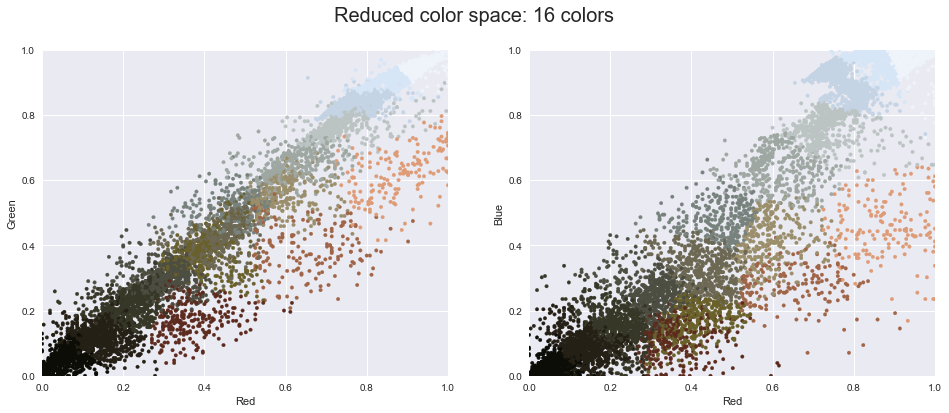

In [175]:
from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(16)
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]
plot_pixels(data, colors=new_colors,title="Reduced color space: 16 colors")

In [180]:
china_recolored = new_colors.reshape(china.shape)

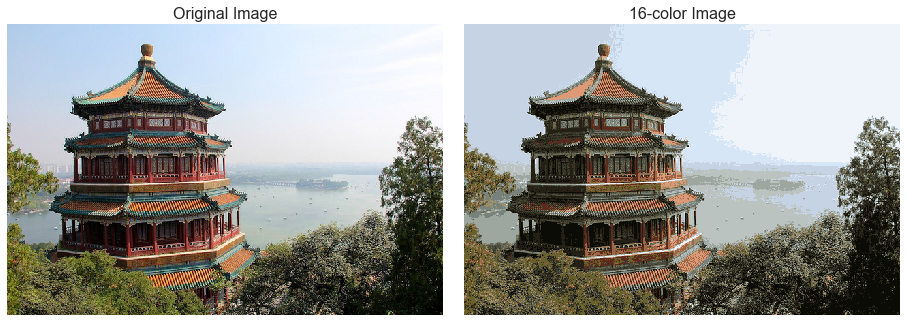

In [221]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6),subplot_kw=dict(xticks=[],yticks=[]))
fig.subplots_adjust(wspace=0.05)

ax[0].imshow(china)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(china_recolored)
ax[1].set_title('16-color Image', size=16);

### lets applied on flower picture

In [284]:
flowers = flower/255
flower_reshape = flowers.reshape(427*640,3)

In [319]:
flower_reshape.shape
kmeans = MiniBatchKMeans(16)
model=kmeans.fit(flower_reshape)

In [320]:
new_flower=model.cluster_centers_[model.predict(flower_reshape)]
new_flower_recolored = new_flower.reshape(flower.shape)

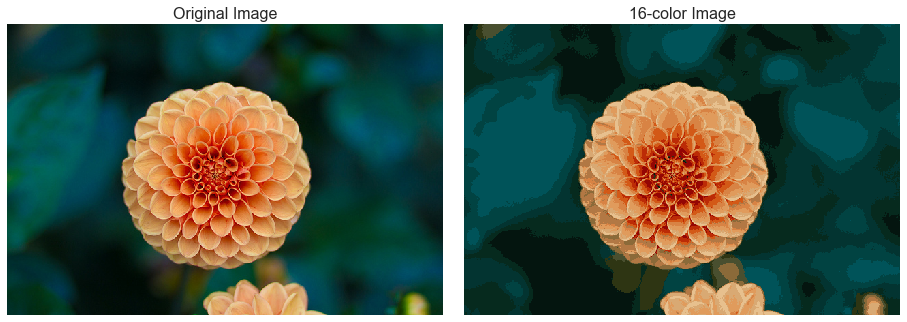

In [321]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6),subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(flowers)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(new_flower_recolored)
ax[1].set_title('16-color Image', size=16);

# In Depth: Gaussian Mixture Models

### Motivating GMM: Weaknesses of k-Means

In [26]:
from sklearn.datasets.samples_generator import make_blobs
X, y_true = make_blobs(n_samples=400, centers=4,cluster_std=0.60, random_state=0)
X = X[:, ::-1] # flip axes for better plotting

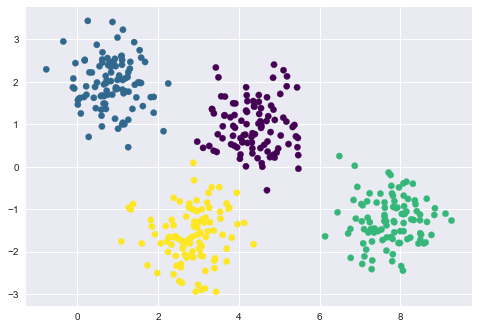

In [27]:
from sklearn.cluster import KMeans
kmeans = KMeans(4,random_state=101)
labels = kmeans.fit(X).predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis');

In [28]:
from scipy.spatial.distance import cdist

In [29]:
def plot_kmeans(kmeans, X, n_clusters=4, rseed=0, ax=None):
    labels = kmeans.fit_predict(X)
    
    ax = ax or plt.gca()
    ax.axis('equal')
    ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='rainbow', zorder=2)
    
    centers = kmeans.cluster_centers_
    radii = [cdist(X[labels == i], [center]).max() for i, center in enumerate(centers)]
    for c, r in zip(centers, radii):
        ax.add_patch(plt.Circle(c, r, fc='#CCCCCC', lw=3, alpha=0.5, zorder=1))
    

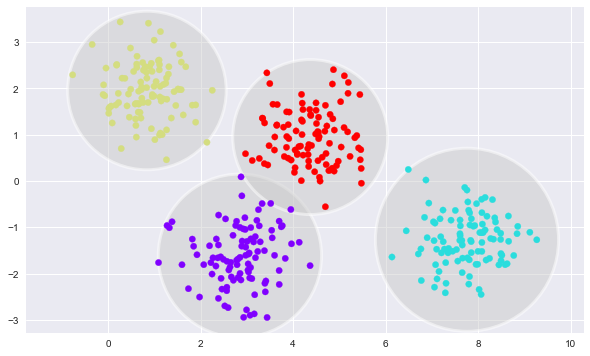

In [30]:
plt.figure(figsize=(10,6))
kmeans = KMeans(n_clusters=4, random_state=0)
plot_kmeans(kmeans, X)

- if we take the same data and transform it, the cluster assignments end up
becoming muddled

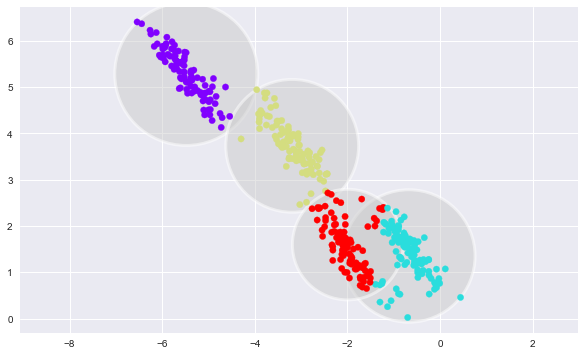

In [31]:
plt.figure(figsize=(10,6))
rng = np.random.RandomState(13)
X_stretched = np.dot(X, rng.randn(2, 2))
kmeans = KMeans(n_clusters=4, random_state=0)
plot_kmeans(kmeans, X_stretched)

### Generalizing E–M: Gaussian Mixture Models

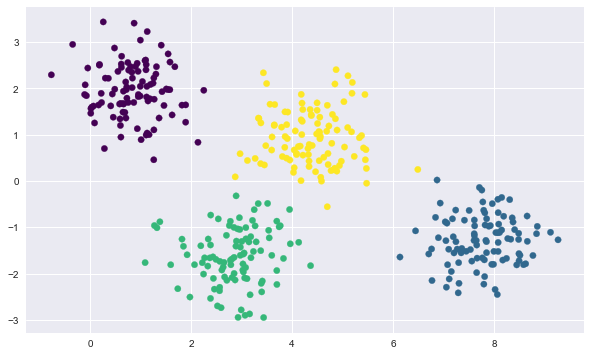

In [32]:
plt.figure(figsize=(10,6))
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=4).fit(X)
labels = gmm.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis');

In [33]:
probs = gmm.predict_proba(X)
print(probs[:5].round(3))

[[0.    0.469 0.    0.531]
 [0.    0.    1.    0.   ]
 [0.    0.    1.    0.   ]
 [0.    0.    0.    1.   ]
 [0.    0.    1.    0.   ]]


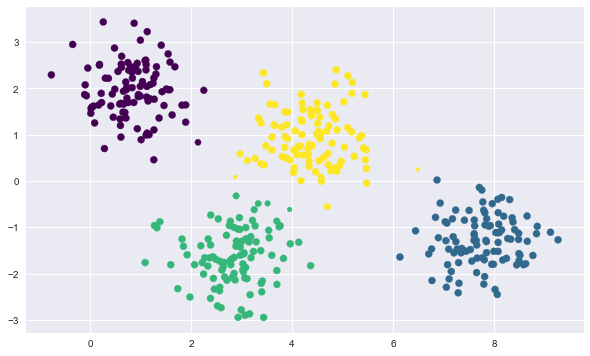

In [34]:
plt.figure(figsize=(10,6))
size = 50 * probs.max(1) ** 2 # square emphasizes differences
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=size);

In [35]:
from matplotlib.patches import Ellipse
def draw_ellipse(position, covariance, ax=None, **kwargs):
    
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()
    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    # Draw the ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height, angle, **kwargs))
    
def plot_gmm(gmm, X, label=True, ax=None):
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    
    if label:
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)
    else:
        ax.scatter(X[:, 0], X[:, 1], s=40, zorder=2)
    ax.axis('equal')
    
    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        draw_ellipse(pos, covar, alpha=w * w_factor)

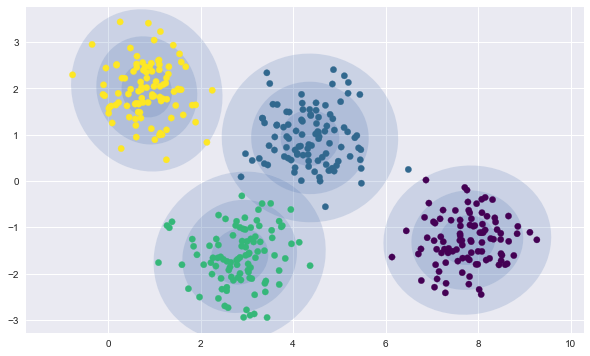

In [36]:
plt.figure(figsize=(10,6))
gmm = GaussianMixture(n_components=4, random_state=42)
plot_gmm(gmm, X)

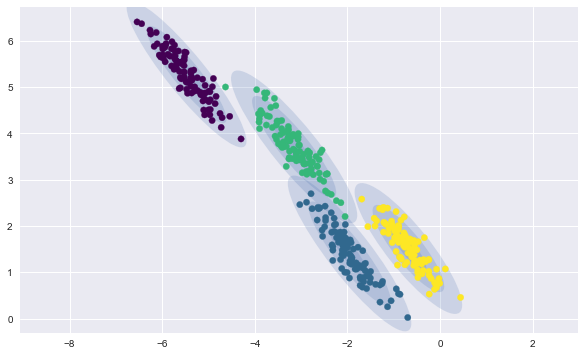

In [37]:
plt.figure(figsize=(10,6))
gmm = GaussianMixture(n_components=4, covariance_type='full', random_state=42)
plot_gmm(gmm, X_stretched)

TypeError: cannot unpack non-iterable numpy.float64 object

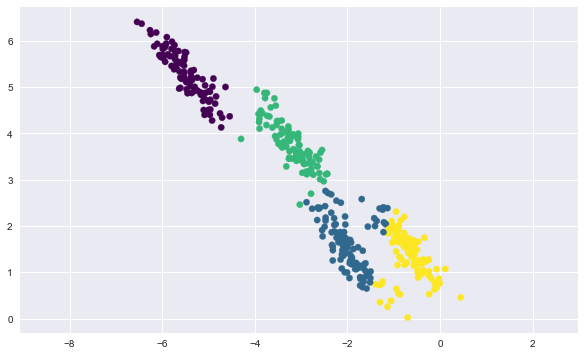

In [38]:
plt.figure(figsize=(10,6))
gmm = GaussianMixture(n_components=4, covariance_type='spherical', random_state=42)
plot_gmm(gmm, X_stretched)

In [39]:
gmm.covariances_

array([0.21817832, 0.23918916, 0.21492265, 0.20936742])

### GMM as Density Estimation

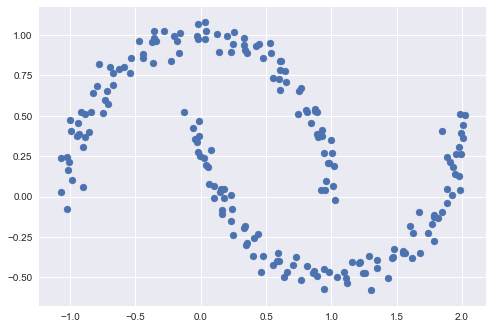

In [40]:
from sklearn.datasets import make_moons
Xmoon, ymoon = make_moons(200, noise=.05, random_state=0)
plt.scatter(Xmoon[:, 0], Xmoon[:, 1]);

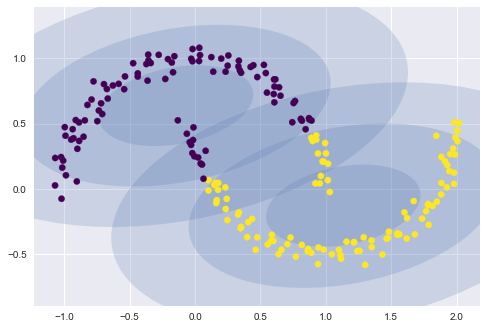

In [41]:
gmm2 = GaussianMixture(n_components=2, covariance_type='full', random_state=0)
plot_gmm(gmm2, Xmoon)

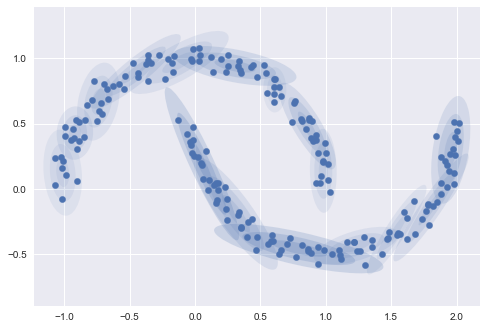

In [42]:
gmm16 = GaussianMixture(n_components=16, covariance_type='full', random_state=0)
plot_gmm(gmm16, Xmoon, label=False)

- New data drawn from the 16-component GMM

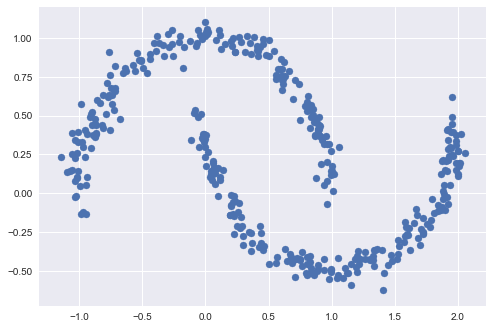

In [43]:
Xnew = gmm16.sample(400)
plt.scatter(Xnew[0][:, 0], Xnew[0][:, 1]);

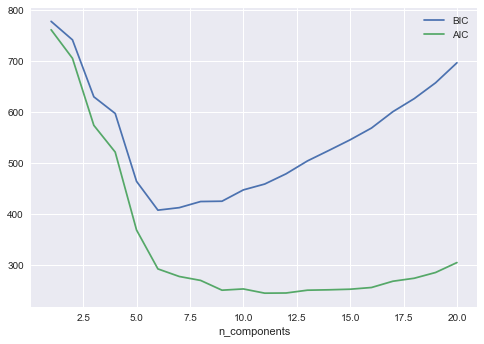

In [44]:
n_components = np.arange(1, 21)
models = [GaussianMixture(n, covariance_type='full', random_state=0).fit(Xmoon) for n in n_components]

plt.plot(n_components, [m.bic(Xmoon) for m in models], label='BIC')
plt.plot(n_components, [m.aic(Xmoon) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components');

### Example: GMM for Generating New Data

In [45]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

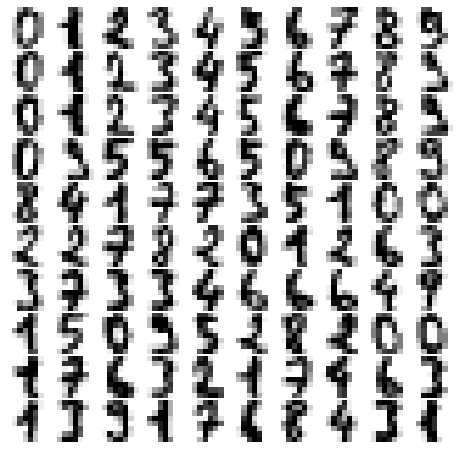

In [46]:
def plot_digits(data):
    fig, ax = plt.subplots(10, 10, figsize=(8, 8),
    subplot_kw=dict(xticks=[], yticks=[]))
    fig.subplots_adjust(hspace=0.05, wspace=0.05)
    for i, axi in enumerate(ax.flat):
        im = axi.imshow(data[i].reshape(8, 8), cmap='binary')
        im.set_clim(0, 16)
plot_digits(digits.data)

In [51]:
from sklearn.decomposition import PCA
pca = PCA(0.99,whiten=True)
data = pca.fit_transform(digits.data)
data.shape

(1797, 41)

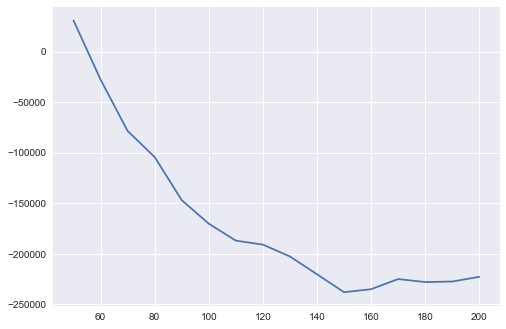

In [52]:
n_components = np.arange(50, 210, 10)
models = [GaussianMixture(n, covariance_type='full', random_state=0) for n in n_components]
aics = [model.fit(data).aic(data) for model in models]
plt.plot(n_components, aics);

In [54]:
gmm = GaussianMixture(150, covariance_type='full', random_state=0)
gmm.fit(data)
print(gmm.converged_)

True


In [61]:
data_new = gmm.sample(100)
data_new[0].shape

(100, 41)

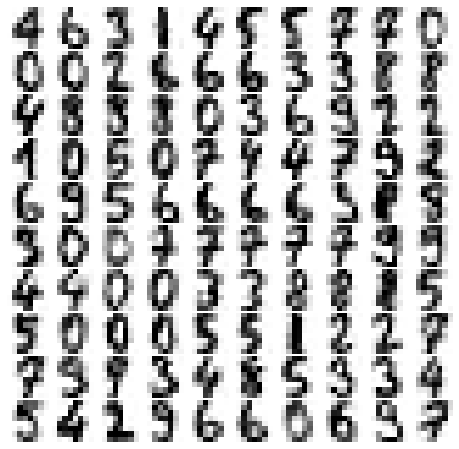

In [63]:
digits_new = pca.inverse_transform(data_new[0])
plot_digits(digits_new)

# In-Depth: Kernel Density Estimation

In [74]:
def make_data(N, f=0.3, rseed=1):
    rand = np.random.RandomState(rseed)
    x = rand.randn(N)
    x[int(f * N):] += 5
    return x
x = make_data(1000)
x[:5]

array([ 1.62434536, -0.61175641, -0.52817175, -1.07296862,  0.86540763])

D:\SOFTWARES DATA SCIENCE\Anaconda\lib\site-packages\ipykernel_launcher.py:1: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  """Entry point for launching an IPython kernel.


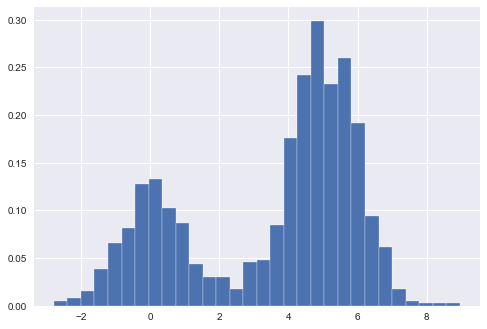

In [75]:
hist = plt.hist(x, bins=30, normed=True)

In [76]:
density, bins, patches = hist
widths = bins[1:] - bins[:-1]
(density * widths).sum()

1.0

In [81]:
x = make_data(20)
bins = np.linspace(-5, 10, 10)

D:\SOFTWARES DATA SCIENCE\Anaconda\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  after removing the cwd from sys.path.
D:\SOFTWARES DATA SCIENCE\Anaconda\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  after removing the cwd from sys.path.


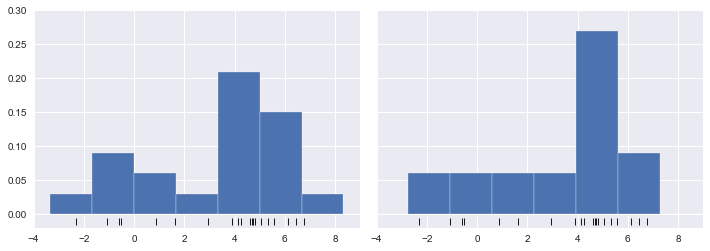

In [84]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4),sharex=True, sharey=True,subplot_kw={'xlim':(-4, 9),'ylim':(-0.02, 0.3)})
fig.subplots_adjust(wspace=0.05)

for i, offset in enumerate([0.0, 0.6]):
    ax[i].hist(x, bins=bins + offset, normed=True)
    ax[i].plot(x, np.full_like(x, -0.01), '|k',markeredgewidth=1)

In [87]:
for i, offset in enumerate([0.0, 0.6]):
    print (offset)

0.0
0.6


(-0.2, 8)

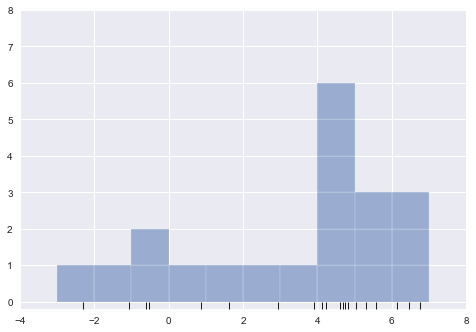

In [88]:
fig, ax = plt.subplots()
bins = np.arange(-3, 8)
ax.plot(x, np.full_like(x, -0.1), '|k',markeredgewidth=1)

for count, edge in zip(*np.histogram(x, bins)):
    for i in range(count):
        ax.add_patch(plt.Rectangle((edge, i), 1, 1, alpha=0.5))
        
ax.set_xlim(-4, 8)
ax.set_ylim(-0.2, 8)

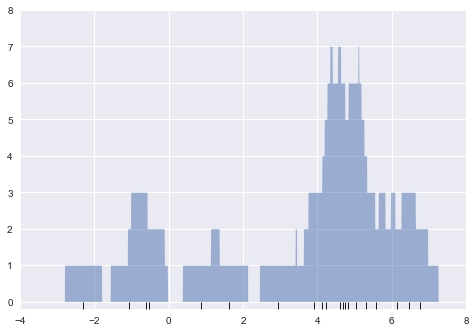

In [89]:
x_d = np.linspace(-4, 8, 2000)
density = sum((abs(xi - x_d) < 0.5) for xi in x)

plt.fill_between(x_d, density, alpha=0.5)
plt.plot(x, np.full_like(x, -0.1), '|k', markeredgewidth=1)

plt.axis([-4, 8, -0.2, 8]);


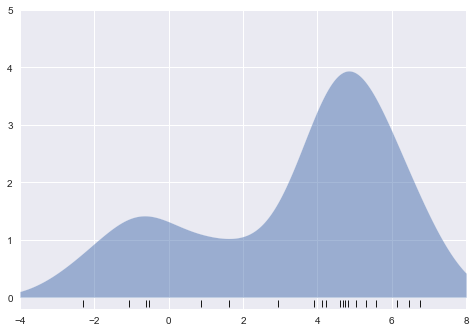

In [90]:
from scipy.stats import norm
x_d = np.linspace(-4, 8, 1000)
density = sum(norm(xi).pdf(x_d) for xi in x)

plt.fill_between(x_d, density, alpha=0.5)
plt.plot(x, np.full_like(x, -0.1), '|k', markeredgewidth=1)

plt.axis([-4, 8, -0.2, 5]);

### Kernel Density Estimation in Practice

(-0.02, 0.22)

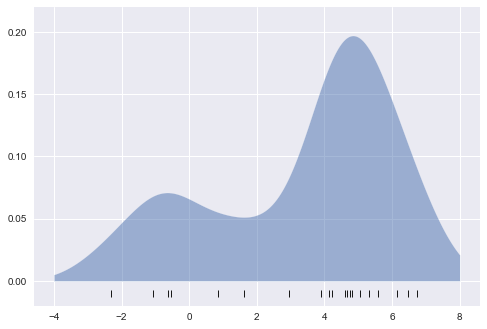

In [91]:
from sklearn.neighbors import KernelDensity
# instantiate and fit the KDE model
kde = KernelDensity(bandwidth=1.0, kernel='gaussian')
kde.fit(x[:, None])

# score_samples returns the log of the probability density
logprob = kde.score_samples(x_d[:, None])

plt.fill_between(x_d, np.exp(logprob), alpha=0.5)
plt.plot(x, np.full_like(x, -0.01), '|k', markeredgewidth=1)
plt.ylim(-0.02, 0.22)

# Application: A Face Detection Pipeline

In [117]:
from skimage import data, color, feature
import skimage.data

image = color.rgb2gray(data.chelsea())
hog_vec, hog_vis = feature.hog(image, visualize=True)

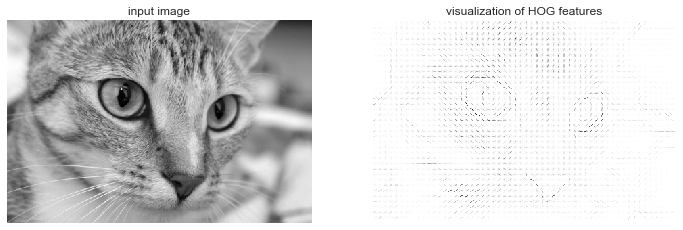

In [118]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6),subplot_kw=dict(xticks=[], yticks=[]))


ax[0].imshow(image, cmap='gray')
ax[0].set_title('input image')

ax[1].imshow(hog_vis)
ax[1].set_title('visualization of HOG features');

### HOG in Action: A Simple Face Detector

--1 Obtain a set of positive training samples.

In [120]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people()
positive_patches = faces.images
positive_patches.shape

(13233, 62, 47)

--2 Obtain a set of negative training samples.

In [125]:
from skimage import data, transform

imgs_to_use = ['camera', 'text', 'coins', 'moon','page', 'clock', 'immunohistochemistry',
'chelsea', 'coffee', 'hubble_deep_field']

images = [color.rgb2gray(getattr(data, name)()) for name in imgs_to_use]

In [126]:
from sklearn.feature_extraction.image import PatchExtractor

In [127]:
def extract_patches(img, N, scale=1.0,patch_size=positive_patches[0].shape):
    extracted_patch_size = \
    tuple((scale * np.array(patch_size)).astype(int))
    extractor = PatchExtractor(patch_size=extracted_patch_size,max_patches=N, random_state=0)
    patches = extractor.transform(img[np.newaxis])
   
    if scale != 1:
        patches = np.array([transform.resize(patch, patch_size) for patch in patches])
    return patches

In [128]:
negative_patches = np.vstack([extract_patches(im, 1000, scale) for im in images for scale in [0.5, 1.0, 2.0]])
negative_patches.shape

(30000, 62, 47)

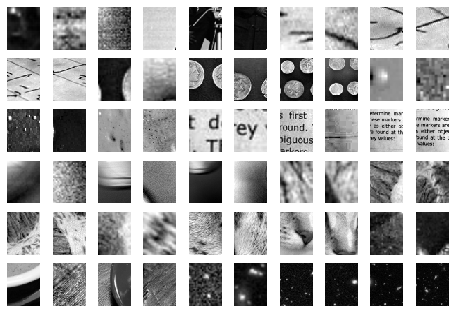

In [129]:
fig, ax = plt.subplots(6, 10)
for i, axi in enumerate(ax.flat):
    axi.imshow(negative_patches[500 * i], cmap='gray')
    axi.axis('off')

-- 3 Combine sets and extract HOG features.

In [131]:
from itertools import chain
X_train = np.array([feature.hog(im)
for im in chain(positive_patches,negative_patches)])
y_train = np.zeros(X_train.shape[0])
y_train[:positive_patches.shape[0]] = 1
X_train.shape

(43233, 1215)

--4 Train a support vector machine.

In [133]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score

In [134]:
cross_val_score(GaussianNB(), X_train, y_train)

array([0.94772754, 0.97189777, 0.97236036, 0.97490169, 0.97374508])

In [136]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(LinearSVC(), {'C': [1.0, 2.0, 4.0, 8.0]})
grid.fit(X_train, y_train)
grid.best_score_

D:\SOFTWARES DATA SCIENCE\Anaconda\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\SOFTWARES DATA SCIENCE\Anaconda\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\SOFTWARES DATA SCIENCE\Anaconda\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\SOFTWARES DATA SCIENCE\Anaconda\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\SOFTWARES DATA SCIENCE\Anaconda\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase th

0.9884578497284486

In [138]:
grid.best_params_

{'C': 1.0}

In [139]:
model = grid.best_estimator_
model.fit(X_train, y_train)

LinearSVC()

-- 5 Find faces in a new image.

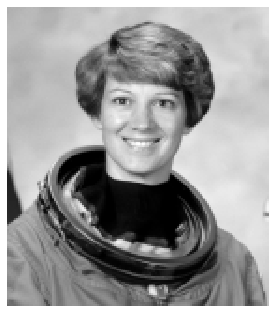

In [175]:
test_image = skimage.data.astronaut()
test_image = skimage.color.rgb2gray(test_image)
test_image = skimage.transform.rescale(test_image, 0.5)
test_image = test_image[:160, 40:180]

plt.imshow(test_image, cmap='gray')
plt.axis('off');

In [176]:
def sliding_window(img, patch_size=positive_patches[0].shape,istep=2, jstep=2, scale=1.0):
    Ni, Nj = (int(scale * s) for s in patch_size)
    for i in range(0, img.shape[0] - Ni, istep):
        for j in range(0, img.shape[1] - Ni, jstep):
            patch = img[i:i + Ni, j:j + Nj]
            if scale != 1:
                patch = transform.resize(patch, patch_size)
            yield (i, j), patch

In [177]:
indices, patches = zip(*sliding_window(test_image))
patches_hog = np.array([feature.hog(patch) for patch in patches])
patches_hog.shape

(1911, 1215)

In [178]:
labels = model.predict(patches_hog)
labels.sum()

49.0

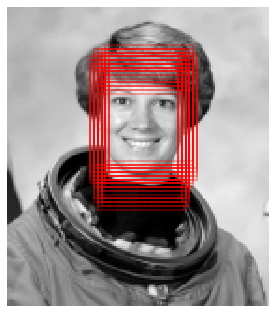

In [179]:
fig, ax = plt.subplots()
ax.imshow(test_image, cmap='gray')
ax.axis('off')

Ni, Nj = positive_patches[0].shape
indices = np.array(indices)

for i, j in indices[labels == 1]:
    ax.add_patch(plt.Rectangle((j, i), Nj, Ni, edgecolor='red',alpha=0.3, lw=2,facecolor='none'))

# Good Job